In [2]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
from functools import reduce




In [3]:
# Import file to df

# Store filepath in a variable
pitch_datapath = "Resources/pitch_data.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
pitch_data_df = pd.read_csv(pitch_datapath, encoding="ISO-8859-1")

# Show just the header
pitch_data_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [4]:
# missed calls


# find the missed calls of balls and strikes
# strikes['Missed'] = strikes["1"].where(strikes['Pitch_X'] > 100 or strikes['Pitch_X'] < -100, strikes["0"])

pitch_data_df['Missed_Call'] = np.where(((pitch_data_df["Called Ball/Strike"] == "Strike") &
                                               ((pitch_data_df['Pitch_X']< -100) | 
                                               (pitch_data_df['Pitch_X']> 100) | 
                                               (pitch_data_df['Pitch_Y']< -100) | 
                                               (pitch_data_df['Pitch_Y']> 100))) |
                                        ((pitch_data_df["Called Ball/Strike"] == "Ball") &
                                               (pitch_data_df['Pitch_X']<= 100) & 
                                               (pitch_data_df['Pitch_X']>= -100) &
                                               (pitch_data_df['Pitch_Y']<= 100) &
                                               (pitch_data_df['Pitch_Y']>= -100)), 'yes', 'no')
                                                
# strikes.head()

# pitch_data_df['Missed_Call_Ball'] = np.where((pitch_data_df['Pitch_X']<= 100) & (pitch_data_df['Pitch_X']>= -100) & 
#                                 (pitch_data_df['Pitch_Y']<= 100) & (balls['Pitch_Y']>= -100), 'yes', 'no')
# balls.head(3)
pitch_data_df.head()


,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Missed_Call
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,no
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,no
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,no
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,no
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,no


In [5]:
#Build summary dataframe for bar chart

total_aways = pitch_data_df[(pitch_data_df['Home/Away'] == 'Away')].groupby('Umpire')['Pitch_X'].count()

missed_aways = pitch_data_df[(pitch_data_df['Home/Away'] == 'Away') & (pitch_data_df['Missed_Call'] == 'yes')].groupby('Umpire')['Missed_Call'].count()

missed_homes = pitch_data_df[(pitch_data_df['Home/Away'] == 'Home') & (pitch_data_df['Missed_Call'] == 'yes')].groupby('Umpire')['Missed_Call'].count()

all_pitches = pitch_data_df.groupby('Umpire')['Game_ID'].count()

all_data = pd.DataFrame(all_pitches)

all_data['Missed_Away'] = missed_aways

all_data['Missed_Home'] = missed_homes
                            
all_data['Total Aways'] = total_aways

all_data['Total Homes'] = all_data['Game_ID'] - all_data['Total Aways']                            

all_data['% Missed Home'] = all_data['Missed_Home'] / all_data['Total Homes'] 

all_data['% Missed Away'] = all_data['Missed_Away'] / all_data['Total Aways'] 

all_data['Home/Away Delta'] = all_data['% Missed Home'] - all_data['% Missed Away']

all_data.head()

,Game_ID,Missed_Away,Missed_Home,Total Aways,Total Homes,% Missed Home,% Missed Away,Home/Away Delta
Umpire,,,,,,,,
Adrian Johnson,148,6,11,67,81,0.135802,0.089552,0.046250
Alan Porter,136,7,5,73,63,0.079365,0.095890,-0.016525
Angel Hernandez,138,8,3,79,59,0.050847,0.101266,-0.050418
Brian Gorman,143,6,8,80,63,0.126984,0.075000,0.051984
Chad Fairchild,254,6,10,125,129,0.077519,0.048000,0.029519


In [6]:
all_data.index

Index(['Adrian Johnson', 'Alan Porter', 'Angel Hernandez', 'Brian Gorman',
       'Chad Fairchild', 'Chris Conroy', 'Chris Guccione', 'Cory Blaser',
       'Dan Bellino', 'Gary Cederstrom', 'Gerry Davis', 'Greg Gibson',
       'Hunter Wendelstedt', 'James Hoye', 'Jeff Nelson', 'Jerry Layne',
       'Jim Wolf', 'Joe West', 'Kerwin Danley', 'Lance Barksdale',
       'Mark Carlson', 'Mike Muchlinski', 'Mike Winters', 'Scott Barry',
       'Ted Barrett', 'Tim Timmons', 'Tom Hallion', 'Vic Carapazza'],
      dtype='object', name='Umpire')

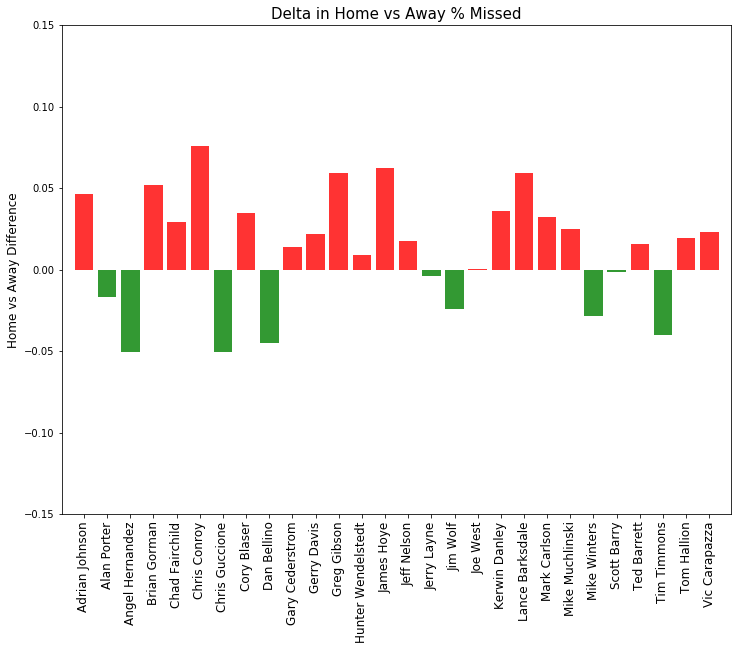

In [11]:
#Plot bar graph of differences in Home and Away percentage

#set size of plots
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
#Set figure width to 12 and height to 9

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#Number of x positions for chart
y_pos = np.arange(len(all_data.index))

#Values to plot
plot_vals = all_data['Home/Away Delta']

#Create colors based on value of change
bar_colors = []

for number in plot_vals:
    if number <= 0:
        bar_colors.append('g')
    else:
        bar_colors.append('r')
        
#Create bar graph container
plt.bar(y_pos, plot_vals, align='center', alpha=0.8,color=bar_colors)

#Formatting and labeling
plt.xticks(y_pos, all_data.index, rotation='vertical')
plt.ylabel('Home vs Away Difference',fontsize=12)
plt.title('Delta in Home vs Away % Missed',fontsize=15)
plt.tick_params(axis='x',labelsize=12)

# plt.xticks(x_pos, xlabels, rotation='vertical')
# plt.ylabel('% Calls Missed',fontsize=12)
# plt.title('Calls Missed as % of Total Calls',fontsize=15)
# plt.tick_params(axis='x',labelsize=12)
plt.margins(0.02)
plt.ylim(-0.15,0.15)

plt.savefig("Home_Away_Deltas.png", bbox_inches="tight")